#### Richards' Equation, transient problems

This tests and demonstrates a variety of Richards equation solutions, demonstrating boundary conditions and seepage face conditions.  All are on a single column of cells, oriented vertically, and are initialized as the hydrostatic solution.  Infilitration is turned on, and/or seepage occurs to raise or lower the water table.

Author: Ethan Coon

In [1]:
%matplotlib inline
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import parse_xmf
import column_data
import colors
import numpy as np
from matplotlib import pyplot as plt

/Users/uec/codes/anaconda/2/5.1.0/base/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def plot(dirname, title):
    fig = plt.figure()
    
    dat = column_data.column_data(["pressure", "saturation_liquid"],
                                      directory=dirname)
    times = np.array(parse_xmf.get_times(directory=dirname))*365
    cm = colors.cm_mapper(times[0], times[-1], 'jet') # color the plots as a function of time

    # Make a dummpy plot using contourf to provide my colorbar info, then clear the figure
    C = [[0,0],[0,0]]
    C3 = plt.contourf(C, times, cmap='jet')
    plt.clf()         
        
    # now make the actual plot
    z = dat[0,0,:]
    n_steps = dat.shape[1]
            
    ax = fig.add_subplot(111)    
    for i in range(dat.shape[1]):
        ax.plot(dat[2,i,:], z, color=cm(times[i]))

    ax.set_xlim([-.1,1.1])
    ax.set_ylim([5,10])
    ax.set_xlabel('saturation [-]')
    ax.set_ylabel('x-coordinate [m]')
    ax.set_title(title)
    cbar = plt.colorbar(C3)
    cbar.ax.set_ylabel("time [days]")
    plt.tight_layout()


The first example simply looks at infiltrating into a column, slowly filling up the subsurface.

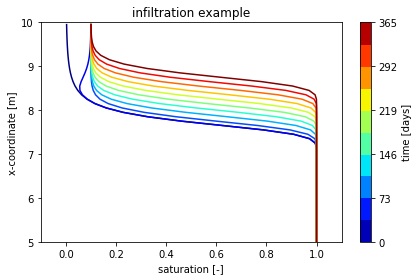

In [3]:
plot("richards-infiltration.demo", "infiltration example")

The next set of problems look at seepage faces, which are boundary conditions that allow water to seep out if the soil is saturated, but don't allow water in.  Starting from a water table below the seepage face at 8m, we infiltrate until the water table rises to this seepage face.  The water table does not rise above the seepage face, but instead flows out of the domain reaching steady-state.

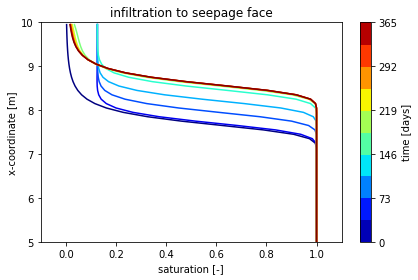

In [4]:
plot("richards-seepage_infiltration.demo", "infiltration to seepage face")

In the second example, we start from a water table above the seepage face, and let the water seep out until the water table draws down to the seepage face.  The water table does not go below the seepage face at 6m.

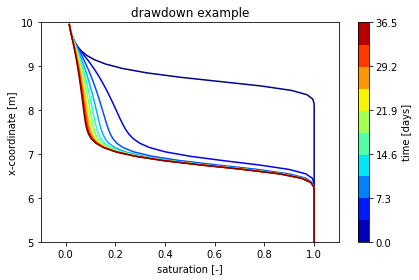

In [5]:
plot("richards-seepage_drawdown.demo", "drawdown example")

The next example shows how a seepage face works in a more dynamic system that ebbs and flows.  We set a seepage face above the water table, and infiltrate until the water table is at the seepage face.  Then we draw down the water table by taking water out of the bottom of the domain.  The water table drops below the seepage face.

This checks that the seepage face can turn both on and off, i.e. swapping back from Neumann to Dirichlet to Neumann again.

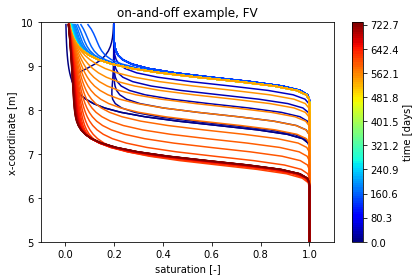

In [6]:
plot("richards-seepage_exfiltration.demo", "on-and-off example, FV")

Demonstration and test of a more general seepage condition in which an infiltration flux is specified on the seepage face.  The condition has constraints on both sides -- infiltration is less than or equal to the specified flux, and the pressure is less than atmospheric.  This is useful for, for instance, spinning up coupled surface-subsurface runs.  The subsurface only is run, with this type of BC everywhere and the infiltration as the mean annual rainfall rate.  Everywhere there are rivers end up with atmospheric pressure, while everywhere there is not ponded water sees the infiltration condition (at steady-state).

In this problem, we set the seepage face on the top surface.  Rain is continuous on this surface for all time.  The water table is initially below the surface.  The seepage face infiltrates until the entire column is saturated, at which point the seepage face sets the max pressure as p_atm.  Then, after 1/2 year, the bottom boundary condition is set to drain the column at twice the rain rate.  This draws down the water table below the surface, and the rain infiltration is again active.  At 3/4 years, the drainage condition is set to equal the rainfall rate, ensuring that steady state is reached and the water table stays below the surface.


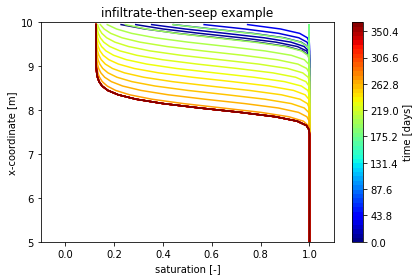

In [7]:
plot("richards-infiltration_then_seepage.demo", 
     "infiltrate-then-seep example")